# Statistical Testing and (Log) Normal Distributions

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


A common assumption made in the theory of financial mathematics is the log-returns of a stock path follow a normal distribution. 

There are several standard statistical tests whose null hypothesis is "The data is normally distributed." Meaning, if the statistical test as low p-value, then we have statistical evidence the data is **not** normally distributed.

The scipy.stats library has several tests available.

     1) Shapiro-Wilk test (scipy.stats.shapiro)
 
     2) D'Agostino and Pearson’s test (scipy.stats.normaltest)
 
     3) Kolmogorov–Smirnov Test (scipy.stats.anderson)
 
The scipy.stats library also has some useful functions for visual aid.

     1) scipy.stats.probplot

### Content of notebook

 1) Demonstration of test for normality of data collected from four distributions, one normal, three non-normal.
 
 2) Normality tests of last two years of log returns of TSLA stock and S&P500 index.
 
 3) Normality test of the log returns of S&P500 index over a historical one year period.

In [1]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_style('darkgrid')

In [6]:
# Generate four data sets collected from a
#1) normal distribution
#2) uniform distribution
#3) poisson distrubtion
#4) lognormal distribution

normal_data = np.random.normal(loc = 0, scale = 1, size = 10000)

uniform_data = np.random.uniform(low = -1, high =1, size = 10000)

poisson_data = np.random.poisson(lam = 1, size = 10000)

lognormal_data = np.random.lognormal(mean = 0, sigma =1, size = 10000)

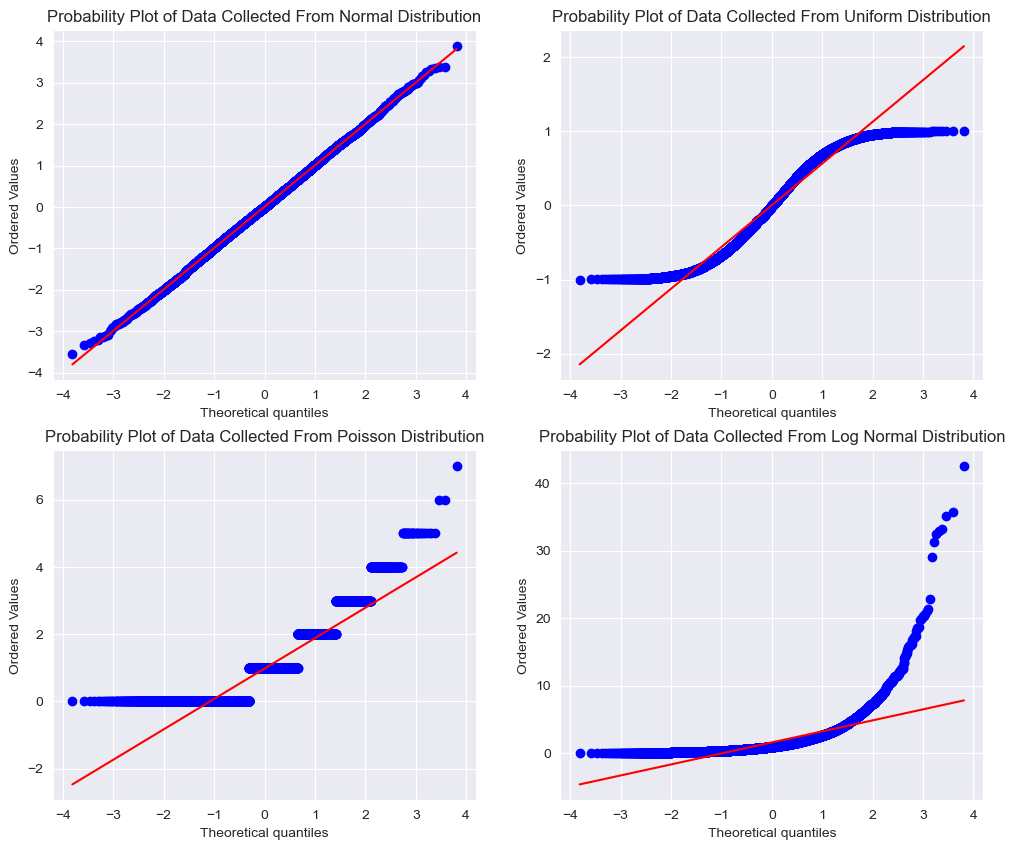

In [7]:
# Create Probability Plots of the distributions. 
#The Probability plot of data collected from a normal distribution is expected to be linear.

fig, axes = plt.subplots(2, 2, figsize=(12, 10))


datasets = [
    (normal_data, "Probability Plot of Data Collected From Normal Distribution"),
    (uniform_data, "Probability Plot of Data Collected From Uniform Distribution"),
    (poisson_data, "Probability Plot of Data Collected From Poisson Distribution"),
    (lognormal_data, "Probability Plot of Data Collected From Log Normal Distribution")
]


for ax, (data, title) in zip(axes.flatten(), datasets):
    stats.probplot(data, dist="norm", plot=ax)
    ax.set_title(title, fontsize=12)
plt.show()

In [8]:
# Perform the D'Agostino and Pearson’s test for Normality on the data sets, 
#We'll use p-value .05 as statistical evidence the data is not collected from a normal distribution


#Compute p-values of normality test
p_normal = stats.normaltest(normal_data)[1]

p_uniform = stats.normaltest(uniform_data)[1]

p_poisson = stats.normaltest(poisson_data)[1]

p_lognormal = stats.normaltest(lognormal_data)[1]


#dictionary of p-values
p_value_dictionary = {'normal distribution':p_normal, 'uniform distribution':p_uniform, 'poisson distribution': p_poisson, 'lognormal distribution': p_lognormal}

print("Normality Test Results (D'Agostino and Pearson's Test):")
print('-------------------------'*3)
for name in p_value_dictionary:
    p = p_value_dictionary[name]
    print(f"{name}: p-value = {p}")
    if p < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")
    print('-------------------------')
    print('-------------------------')

Normality Test Results (D'Agostino and Pearson's Test):
---------------------------------------------------------------------------
normal distribution: p-value = 0.9504898277088554
→ No statistically significant evidence against normality.
-------------------------
-------------------------
uniform distribution: p-value = 0.0
→ Statistically significant evidence that the data is NOT normally distributed.
-------------------------
-------------------------
poisson distribution: p-value = 7.929410457203512e-292
→ Statistically significant evidence that the data is NOT normally distributed.
-------------------------
-------------------------
lognormal distribution: p-value = 0.0
→ Statistically significant evidence that the data is NOT normally distributed.
-------------------------
-------------------------


### Test for normal distribution of log returns of stock movements

In ```yfinance``` the S&P500 index symbol is ```^GSPC```

We'll test for normality the log returns of Tesla and S&P500 index over the past two years of trading days.

In [9]:
#Import packages for yfinance
import yfinance as yf
import datetime as dt

In [10]:
#Two years of data
start_date = dt.datetime.today() - dt.timedelta(days = 2*365)
end_date = dt.datetime.today()


#TSLA stock data, isolate the logreturn data as a numpy array.
TSLA_stock = yf.download('TSLA', start = start_date, end = end_date)
TSLA_returns = TSLA_stock['Close']/TSLA_stock['Close'].shift(1)
TSLA_logreturns = np.log(TSLA_returns.dropna())['TSLA'].values

#S&P500 index data, isolate the logreturn data as a numpy array.
SP_index = yf.download('^GSPC', start = start_date, end = end_date)
SP_returns = SP_index['Close']/SP_index['Close'].shift(1)
SP_logreturns = np.log(SP_returns.dropna())['^GSPC'].values

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


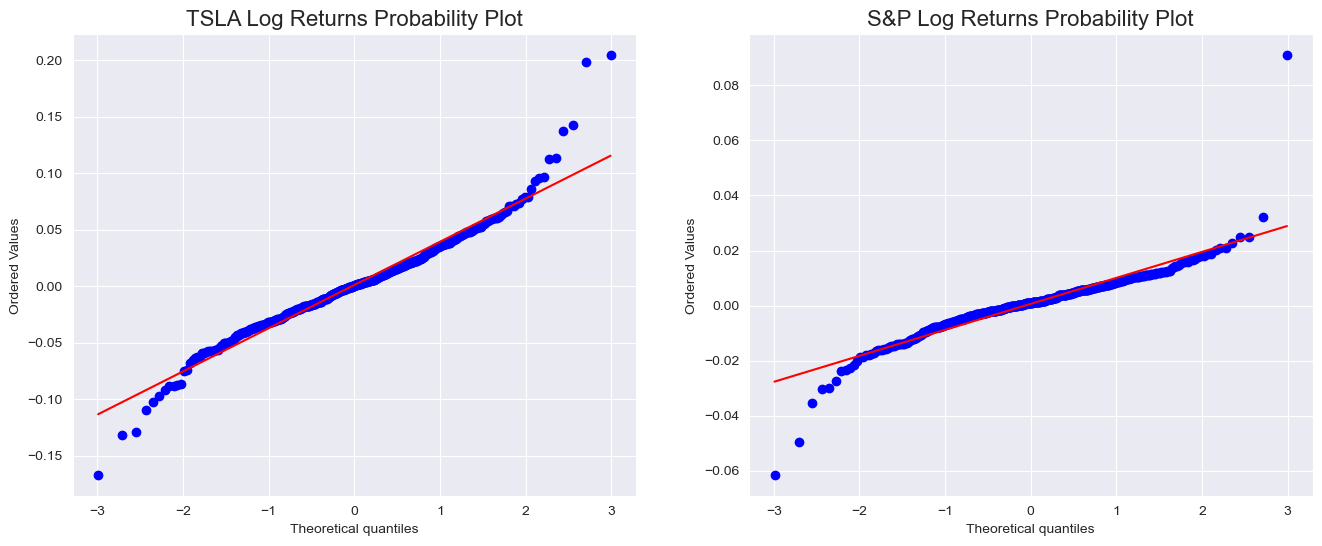

In [11]:
# Create 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot TSLA log returns
stats.probplot(TSLA_logreturns, dist="norm", plot=axes[0])
axes[0].set_title("TSLA Log Returns Probability Plot", fontsize=16)
axes[0].grid(True)

# Plot S&P log returns
stats.probplot(SP_logreturns, dist="norm", plot=axes[1])
axes[1].set_title("S&P Log Returns Probability Plot", fontsize=16)
axes[1].grid(True)

plt.show()

In [12]:
#Collect p-values of normality tests
p_tsla=stats.normaltest(TSLA_logreturns)[1]
p_sp = stats.normaltest(SP_logreturns)[1]



#Print evidence/non-evidence of normality
print(f"TSLA log return distribution: p-value = {p_tsla:.4f}")
if p_tsla < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")
    
print('--'*40) 
print('--'*40) 


print(f"S&P log return distribution: p-value = {p_sp:.4f}")
if p_sp < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

TSLA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
S&P log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.


### Remarks on recent trends

Recent months have been a volatile time in the financial industry. Below is a graph of S&P500 index over the past two years.

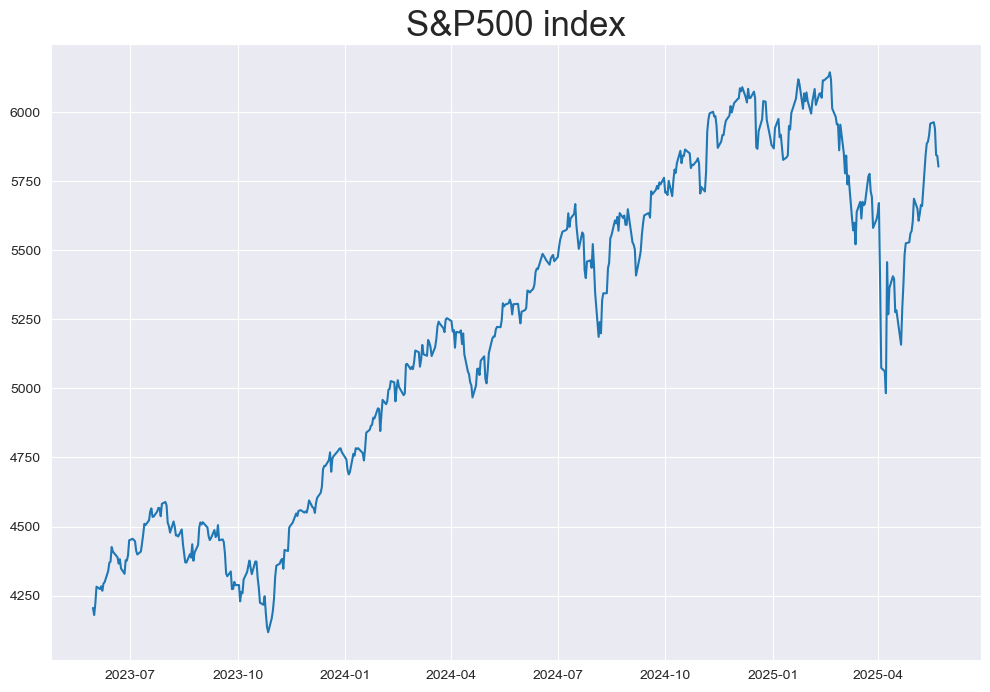

In [13]:
plt.figure(figsize = (12,8))
plt.plot(SP_index['Close'])
plt.title('S&P500 index', size = 25)
plt.show()

### Historical behavior of index funds

Historically, the S&P500 index has more consistent behavior. Below the same analysis performed above on the first half of the S&P500 index trade data collected above.

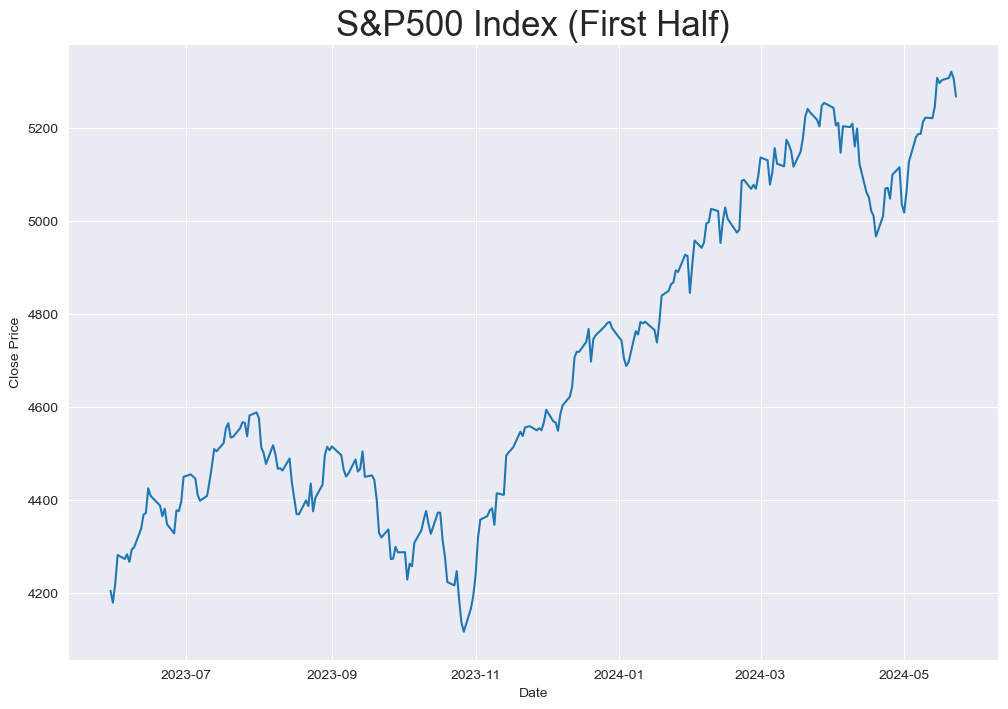

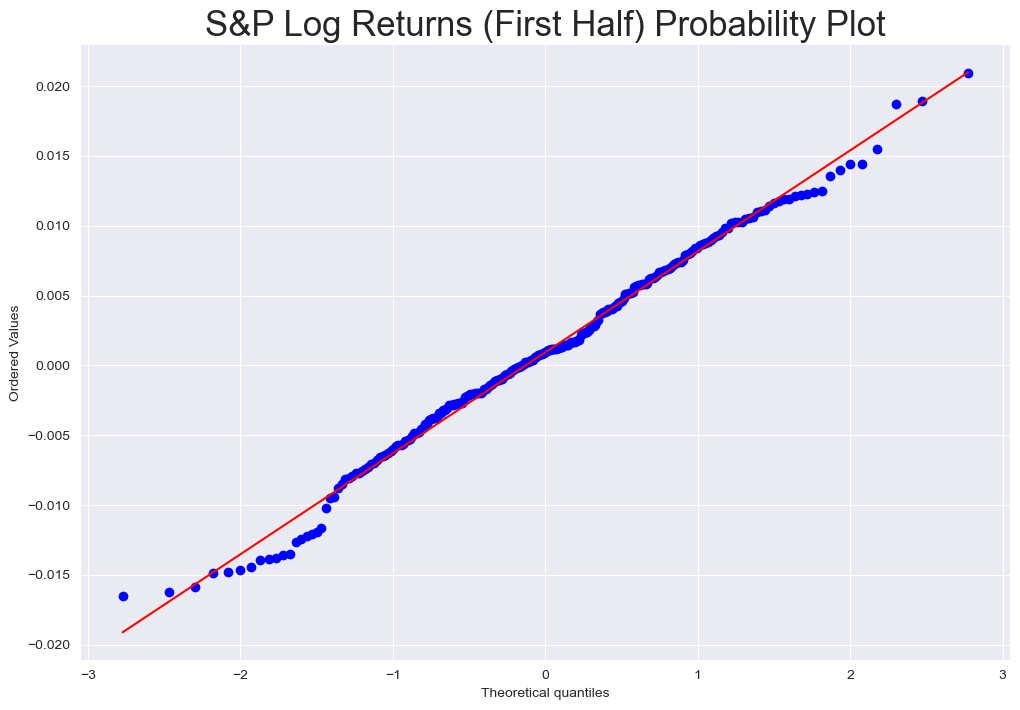

S&P log return (First Half) distribution: p-value = 0.7275
→ No statistically significant evidence against normality.


In [14]:
half_index = int(np.floor(len(SP_logreturns)/2))

SP_logreturns_historical = SP_logreturns[0:half_index]


SP_historical = SP_index['Close'].iloc[:half_index]

# Plot
plt.figure(figsize=(12, 8))
plt.plot(SP_historical)
plt.title('S&P500 Index (First Half)', fontsize=25)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,8))
stats.probplot(SP_logreturns_historical, plot = plt)
plt.title('S&P Log Returns (First Half) Probability Plot', size = '25')
plt.show()



p_sp_historical = stats.normaltest(SP_logreturns_historical)[1]

print(f"S&P log return (First Half) distribution: p-value = {p_sp_historical:.4f}")
if p_sp_historical < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")